Array con los valores óptimos de los parámetros a y b:
[ 429.90654764 -147.00934971]


Matriz de covarianza
[[1048.12622625 -736.30867511]
 [-736.30867511  517.95777967]]


Errores asociados a cada parámetro:
[32.37477762 22.75868581]
Array con los valores óptimos de los parámetros a y b:
[ 293.1034476  -102.93103388]


Matriz de covarianza
[[ 148.63253956 -130.7966338 ]
 [-130.7966338   115.3165541 ]]


Errores asociados a cada parámetro:
[12.19149456 10.73855456]


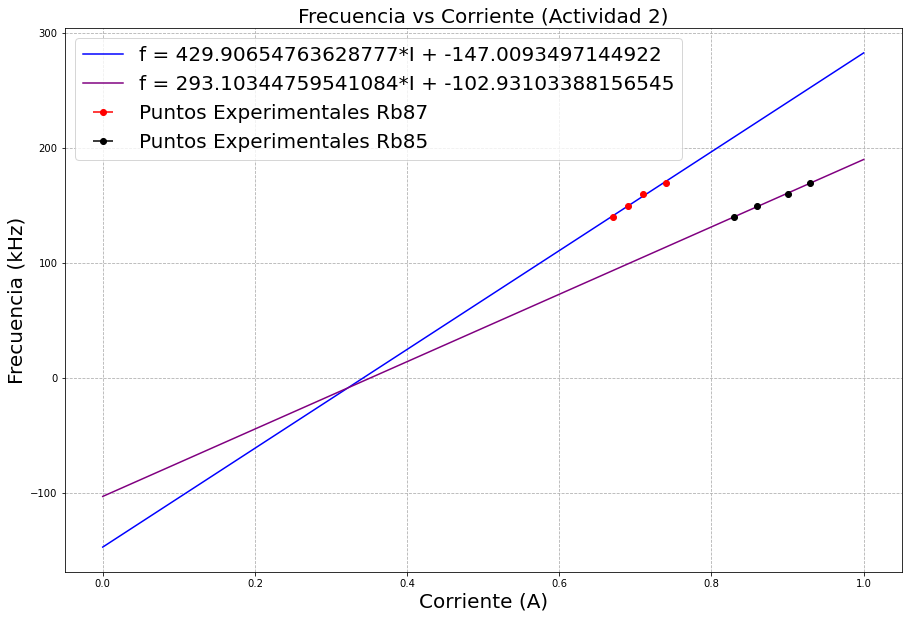

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def funcion_modelo(x,a,b): # Nuestra función modelo es una línea recta, que tiene como parámetros constantes a y b. 
    return a*x + b

frec = np.array([140.0, 150.0, 160.0, 170.0])
corriente_valle_1 = np.array([0.67, 0.69, 0.71, 0.74])
corriente_valle_2 = np.array([0.83, 0.86, 0.90, 0.93])
corriente_valle_3 = np.array([0.825, 0.876, 0.913, 0.916])
corriente = np.linspace(0,1,1000)

popt1, pcov1 = curve_fit(funcion_modelo,corriente_valle_1,frec) # Usamos curve_fit() para poder encontrar los valores óptimos de los parámetros a y b. curve_fit() nos devuelve un array llamado popt con los valores óptimos de los parámetros y también nos da la matriz de covarianza pcov. La matriz de covarianza sirve para encontrar los errores asociados a los parámetros óptimos 
errores1 = np.sqrt(np.diag(pcov1)) # para encontrar los errores debemos extraer la diagonal de la matriz de covarianza y luego, a este array con los elementos de la siagonal, sacarle la raiz cuadrada. Esto tiene que ser así ya que la diagonal de la matriz de covarianza tiene el valor de la varianza (sigma^2) asociado a cada parámetro. El error (sigma) no es más que la raiz de la varianza, también llamado desviación estandar.


print("Array con los valores óptimos de los parámetros a y b:")
print(popt1)
print("\n")
print("Matriz de covarianza")
print(pcov1)
print("\n")
print("Errores asociados a cada parámetro:")
print(errores1)

popt2, pcov2 = curve_fit(funcion_modelo,corriente_valle_2,frec) # Usamos curve_fit() para poder encontrar los valores óptimos de los parámetros a y b. curve_fit() nos devuelve un array llamado popt con los valores óptimos de los parámetros y también nos da la matriz de covarianza pcov. La matriz de covarianza sirve para encontrar los errores asociados a los parámetros óptimos 
errores2 = np.sqrt(np.diag(pcov2)) # para encontrar los errores debemos extraer la diagonal de la matriz de covarianza y luego, a este array con los elementos de la siagonal, sacarle la raiz cuadrada. Esto tiene que ser así ya que la diagonal de la matriz de covarianza tiene el valor de la varianza (sigma^2) asociado a cada parámetro. El error (sigma) no es más que la raiz de la varianza, también llamado desviación estandar.


print("Array con los valores óptimos de los parámetros a y b:")
print(popt2)
print("\n")
print("Matriz de covarianza")
print(pcov2)
print("\n")
print("Errores asociados a cada parámetro:")
print(errores2)

figura = plt.figure(figsize=(15,10))
plt.grid(b=True, linestyle="--")
#plt.scatter(x,y,color="red",alpha=0.5, label="Puntos Experimentales") # Graficamos los puntos originales
plt.errorbar(corriente_valle_1,frec, xerr=0.001,color="red", marker="o", linestyle="none", label="Puntos Experimentales Rb87")
plt.plot(corriente,funcion_modelo(corriente, popt1[0], popt1[1]), color="blue", label="f = {}*I + {}".format(popt1[0], popt1[1]))
plt.errorbar(corriente_valle_2,frec, xerr=0.001,color="black", marker="o", linestyle="none", label="Puntos Experimentales Rb85")
plt.plot(corriente,funcion_modelo(corriente, popt2[0], popt2[1]), color="purple", label="f = {}*I + {}".format(popt2[0], popt2[1]))# Graficamos la función modelo con los parámetros óptimos. Pudimos escribir funcion_modelo(x,popt[0],popt[1]) ya que la funcion_modelo() tiene 3 parámetros de entrada, pero poner funcion_modelo(x,*popt) es un shortcut para hacer exactamente lo mismo y sirve para cualquier cantidad de parámetros que usemos
plt.xlabel("Corriente (A)", fontsize=20)
plt.ylabel("Frecuencia (kHz)", fontsize=20)
plt.title("Frecuencia vs Corriente (Actividad 2)", fontsize=20)
plt.legend(fontsize=20)
plt.show()